Enter number of nodes:  4


Enter neighbors and weights for node 0 (e.g., [(1, 2), (3, 6)]):


 [(1,2),(2,4)]


Enter neighbors and weights for node 1 (e.g., [(1, 2), (3, 6)]):


 [(0,2),(3,5)]


Enter neighbors and weights for node 2 (e.g., [(1, 2), (3, 6)]):


 [(0,4),(3,9)]


Enter neighbors and weights for node 3 (e.g., [(1, 2), (3, 6)]):


 [(1,5),(2,9)]



Starting Kruskal's Algorithm...

Adding edge (0 -> 1) with weight 2 to the MST.
Adding edge (0 -> 2) with weight 4 to the MST.
Adding edge (1 -> 3) with weight 5 to the MST.

Kruskal's Algorithm completed.
Total weight of MST: 11
MST edges: [(0, 1, 2), (0, 2, 4), (1, 3, 5)]


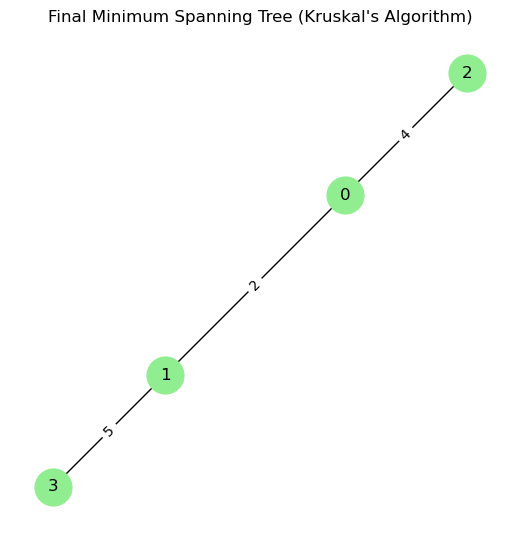


Minimum Spanning Tree: [(0, 1, 2), (0, 2, 4), (1, 3, 5)]
Total weight: 11


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        if xroot != yroot:
            self.parent[yroot] = xroot
            return True
        return False

def kruskal_mst(graph, n):
    edges = []
    for u in graph:
        for v, w in graph[u]:
            if u < v:  # To avoid duplicate edges
                edges.append((w, u, v))

    edges.sort()
    ds = DisjointSet(n)
    mst = []
    total_weight = 0

    G = nx.Graph()

    print("\nStarting Kruskal's Algorithm...\n")
    for weight, u, v in edges:
        if ds.union(u, v):
            mst.append((u, v, weight))
            total_weight += weight
            print(f"Adding edge ({u} -> {v}) with weight {weight} to the MST.")
            G.add_edge(u, v, weight=weight)

    print("\nKruskal's Algorithm completed.")
    print("Total weight of MST:", total_weight)
    print("MST edges:", mst)

    # Plot the final Minimum Spanning Tree
    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgreen", font_size=12)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Final Minimum Spanning Tree (Kruskal's Algorithm)")
    plt.show()

    return mst, total_weight

if __name__ == "__main__":
    graph = {}
    n = int(input("Enter number of nodes: "))
    for i in range(n):
        print(f"Enter neighbors and weights for node {i} (e.g., [(1, 2), (3, 6)]):")
        neighbors = eval(input())
        graph[i] = neighbors
    mst, total_weight = kruskal_mst(graph, n)
    print("\nMinimum Spanning Tree:", mst)
    print("Total weight:", total_weight)
